In [253]:
import pandas as pd
import ast, json
import csv
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
conn = sqlite3.connect('im.db.zip')
sns.set_context("poster")
sns.set_style("darkgrid")

In [254]:
bom_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
movies = pd.read_csv('data/tmdb.movies.csv.gz')
budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
reviews = pd.read_csv('data/rt.reviews.tsv',sep='\t',encoding='latin1')


In [255]:
bom_movies = pd.merge(bom_gross_df,movies, left_on='title', right_on='original_title', how='left',suffixes=('','_y'))

In [256]:
bom_movies

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title_y,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7.0,"[16, 10751, 35]",10193.0,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,4.0,"[28, 878, 12]",27205.0,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,The Quake,Magn.,6200.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3719,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3720,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3721,The Swan,Synergetic,2400.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
bom_movies.drop([ 'studio','year',
       'Unnamed: 0','id','title_y'  ], axis=1, inplace=True)
bom_movies

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
1,Alice in Wonderland (2010),334200000.0,691300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...
3718,The Quake,6200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3719,Edward II (2018 re-release),4800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3720,El Pacto,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3721,The Swan,2400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
print(bom_movies.shape)
bom_movies = bom_movies.drop_duplicates(keep='first')
print(bom_movies.shape)

(3723, 10)
(3502, 10)


In [259]:
# replacing all the zeros.
cols = ['domestic_gross', 'foreign_gross','popularity', 'vote_average','vote_count']
bom_movies[cols] = bom_movies[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
bom_movies.dropna(subset=cols, inplace=True)
bom_movies.shape

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_17615/2277969156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movies[cols] = bom_movies[cols].replace(0, np.nan)
/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_17615/2277969156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movies.dropna(subset=cols, inplace=True)


(1404, 10)

In [260]:
bom_movies

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0
...,...,...,...,...,...,...,...,...,...,...
3598,Bilal: A New Breed of Hero,491000.0,1700000,"[28, 12, 16]",en,Bilal: A New Breed of Hero,2.707,2018-02-02,6.8,54.0
3602,I Still See You,1400.0,1500000,"[53, 14]",en,I Still See You,12.867,2018-10-12,6.8,196.0
3616,The Catcher Was a Spy,725000.0,229000,"[18, 10752, 53]",en,The Catcher Was a Spy,9.727,2018-06-22,6.2,67.0
3639,Time Freak,10000.0,256000,"[35, 878]",en,Time Freak,1.604,2011-02-10,6.9,9.0


In [261]:
bom_movies['genre_ids'] = {
    'Action': '28',
    'Adventure': '12',
    'Animation': '16',
    'Comedy': '35',
    'Crime': '80',
    'Documentary': '99',
    'Drama': '18',
    'Family': '10751',
    'Fantasy': '14',
    'History': '36',
    'Horror': '27',
    'Music': '10402',
    'Mystery': '9648',
    'Romance': '10749',
    'ScienceFiction': '878',
    'TVMovie': '10770',
    'Thriller': '53',
    'War': '10752',
    'Western': '37'
}
for key in bom_movies['genre_ids'] :
    print(key)

ValueError: Length of values (19) does not match length of index (1404)

In [218]:
df=pd.DataFrame(bom_movies)

In [234]:
bom_movies['genre_ids'] = bom_movies['genre_ids'].map(genre_dict)

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_17615/169524754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movies['genre_ids'] = bom_movies['genre_ids'].map(genre_dict)


In [235]:
bom_movies['genre_dict']=bom_movies.genre_dict.replace(genre_ids)

AttributeError: 'DataFrame' object has no attribute 'genre_dict'

In [199]:
bom_movies['genre_ids'] = bom_movies['genre_ids'].fillna(bom_movies['genre_dict'].astype(str).map(d))

KeyError: 'genre_dict'

In [187]:
bom_movies['genre_ids'].replace(dict, inplace=True)

TypeError: Expecting 'to_replace' to be either a scalar, array-like, dict or None, got invalid type 'type'

In [200]:
df['genre_ids']=df['genre_ids'].map(genre_ids)

In [160]:
genre_dict = {"genre_ids":[28,12,16,35,80,99,18,10751,14,36], 
             "genre":['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy',
                     'History']}
 
#data = pd.DataFrame(bom_movies)
print("Original Data frame:\n")
print(bom_movies)

Original Data frame:

                           title      studio  domestic_gross foreign_gross  \
0                    Toy Story 3          BV     415000000.0     652000000   
3                      Inception          WB     292600000.0     535700000   
4            Shrek Forever After        P/DW     238700000.0     513900000   
5     The Twilight Saga: Eclipse        Sum.     300500000.0     398000000   
6                     Iron Man 2        Par.     312400000.0     311500000   
...                          ...         ...             ...           ...   
3598  Bilal: A New Breed of Hero          VE        491000.0       1700000   
3602             I Still See You         LGF          1400.0       1500000   
3616       The Catcher Was a Spy         IFC        725000.0        229000   
3639                  Time Freak  Grindstone         10000.0        256000   
3640                  Time Freak  Grindstone         10000.0        256000   

      year  Unnamed: 0                gen

In [161]:

def parse_col_json(column, key):
    for index,i in zip(bom_movies.index,bom_movies[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))
        bom_movies.loc[index,column]=str(list1)
    
    parse_col_json('genre_ids', 'genre')
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title_y,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7.0,"[16, 10751, 35]",10193.0,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340.0
3,Inception,WB,292600000.0,535700000,2010,4.0,"[28, 878, 12]",27205.0,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843.0
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15.0,"[12, 14, 18, 10749]",24021.0,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909.0
6,Iron Man 2,Par.,312400000.0,311500000,2010,2.0,"[12, 28, 878]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0


In [17]:
# bom_movies= {"genre_ids":[28,12,16,35,80,99,18,10751,14,36], 
#              "genre":['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy',
#                      'History']}
 
# data = pd.DataFrame(bom_movies)
# print("Original Data frame:\n")
# print(bom_movies)

Original Data frame:

{'genre_ids': [28, 12, 16, 35, 80, 99, 18, 10751, 14, 36], 'genre': ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History']}


In [85]:
list1

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History']

In [87]:
pd.Series(list1)

0         Action
1      Adventure
2      Animation
3         Comedy
4          Crime
5    Documentary
6          Drama
7         Family
8        Fantasy
9        History
dtype: object

In [90]:
bom_movies[['title','genre_ids']].explode('genre_ids')

,title,genre_ids
0,Toy Story 3,"[16, 10751, 35]"
3,Inception,"[28, 878, 12]"
4,Shrek Forever After,"[35, 12, 14, 16, 10751]"
5,The Twilight Saga: Eclipse,"[12, 14, 18, 10749]"
6,Iron Man 2,"[12, 28, 878]"
...,...,...
3598,Bilal: A New Breed of Hero,"[28, 12, 16]"
3602,I Still See You,"[53, 14]"
3616,The Catcher Was a Spy,"[18, 10752, 53]"
3639,Time Freak,"[35, 878]"


Action
Adventure
Animation
Comedy
Crime
Documentary
Drama
Family
Fantasy
History


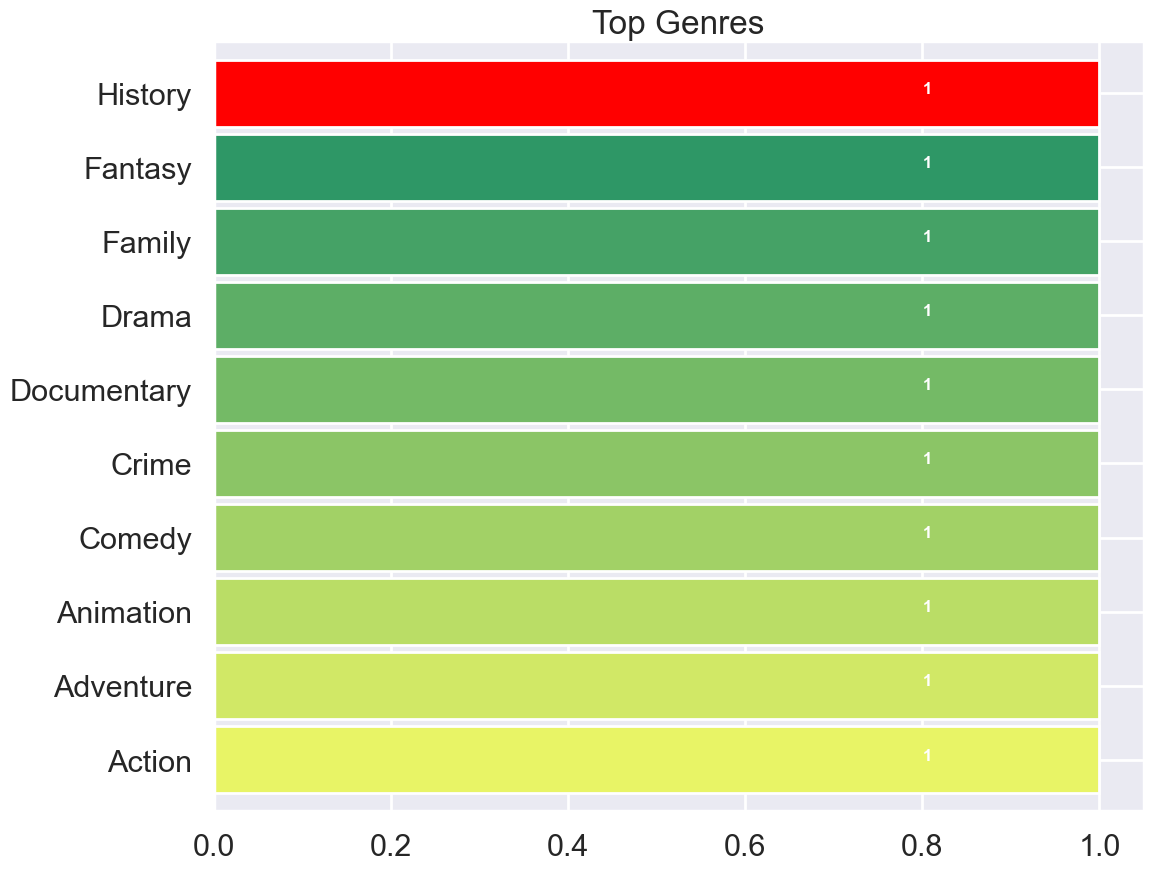

In [86]:
plt.subplots(figsize=(12,10))
list1=[]
for i in genre_dict['genre']:
    print(i)
    list1.append(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

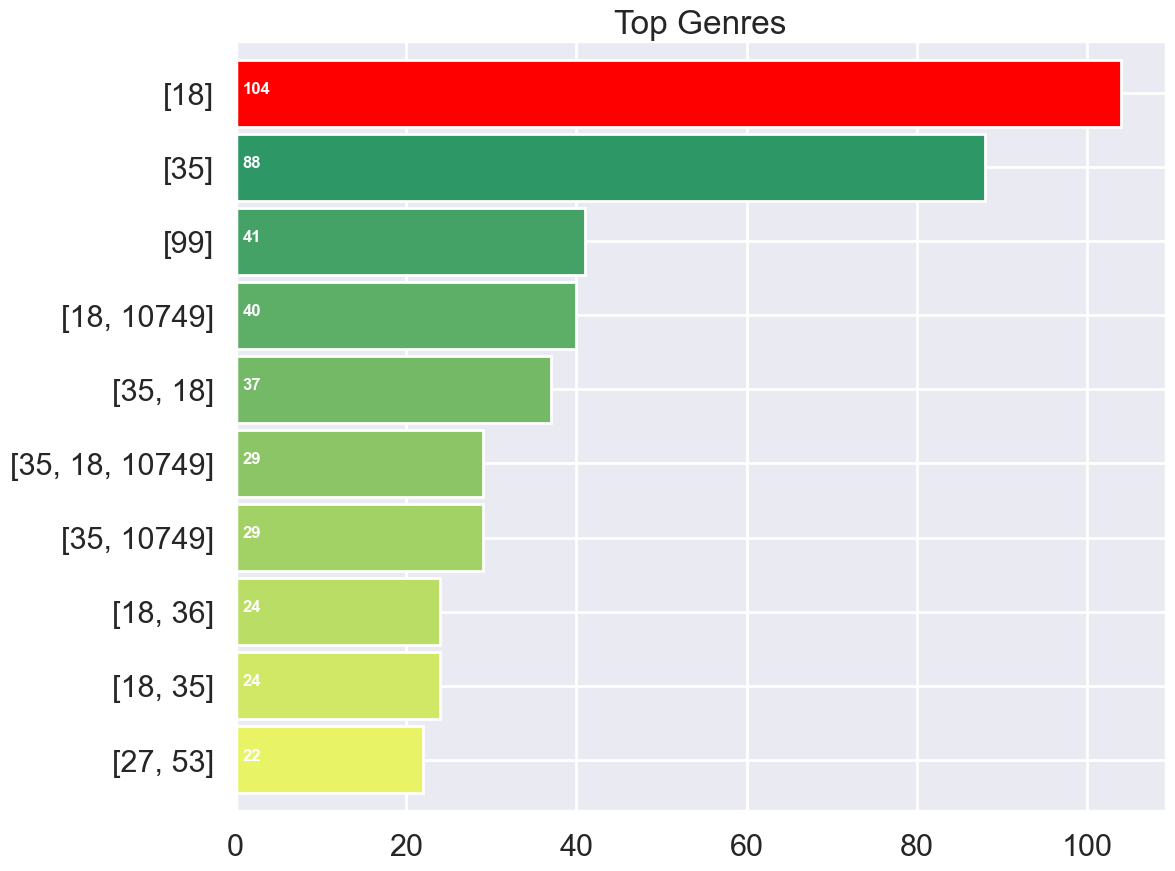

In [262]:
plt.subplots(figsize=(12,10))
list1=[]
for i in bom_movies['genre_ids']:
    list1.append(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()